In [17]:
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
df = pd.read_excel("C:/Users/Maryam Yusuf/Downloads/ENB2012_data.xlsx")

In [19]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [20]:
df.dropna()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [21]:
column_names = {"X1": "Relative_Compactness", "X2": "Surface_Area", 
               "X3": "Wall_Area", "X4": "Roof_Area", "X5": "Overall_Height",
               "X6": "Orientation", "X7": "Glazing_Area", 
               "X8": "Glazing_Area_Distribution",
               "Y1": "Heating_Load", "Y2": "Cooling_Load"}

In [22]:
df = df.rename(columns=column_names)

In [23]:
simple_linear_reg_df = df[["Relative_Compactness", "Cooling_Load"]].sample(15, random_state=2)

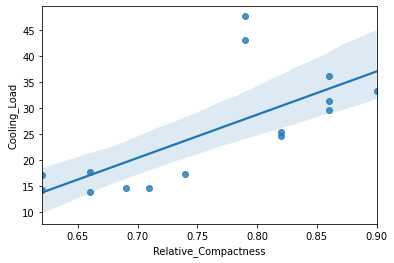

In [24]:
sns.regplot(x="Relative_Compactness", y="Cooling_Load",
           data=simple_linear_reg_df);

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=["Heating_Load", "Cooling_Load"])
heating_target = normalised_df["Heating_Load"]

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, heating_target, test_size = 0.3, random_state = 1)

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predicted_values = linear_model.predict(X_test)

# MAE

In [29]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.063

# R2- Squared

In [30]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 3)

0.893

# RSS

In [31]:
import numpy as np
rss = np.sum(np.sum(np.square(y_test - predicted_values)))
round(rss, 3)

1.827

# Root Mean Square Error

In [32]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

# Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [36]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha =0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [42]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(linear_model, X_train, "Linear_Model_Weight")
ridge_weights_df = get_weights_df(ridge_reg, X_train, "Ridge_Weight_")
lasso_weights_df = get_weights_df(lasso_reg, X_train, "Lasso_weight")

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weights_df, on = "Features")

In [43]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight_,Lasso_weight
0,Roof_Area,-6.241589e+12,-0.163192,-0.000000
1,Wall_Area,-4.854569e+12,0.103061,0.200087
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
3,Orientation,4.577637e-03,0.003369,0.000000
4,Glazing_Area_Distribution,3.216696e-02,0.029088,0.021431
5,Glazing_Area,2.148514e-01,0.212449,0.206132
6,Overall_Height,3.964844e-01,0.442467,0.463482
7,Surface_Area,8.322118e+12,-0.062275,0.000000


In [45]:
def get_weights_df(model, feat, col_name):
 
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df

linear_model_weights = get_weights_df(linear_model, X_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, X_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, X_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Roof_Area,-6.241589e+12,-0.163192,-0.000000
1,Wall_Area,-4.854569e+12,0.103061,0.200087
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
3,Orientation,4.577637e-03,0.003369,0.000000
4,Glazing_Area_Distribution,3.216696e-02,0.029088,0.021431
5,Glazing_Area,2.148514e-01,0.212449,0.206132
6,Overall_Height,3.964844e-01,0.442467,0.463482
7,Surface_Area,8.322118e+12,-0.062275,0.000000


# Quiz

In [153]:
energy_df = pd.read_csv("C:/Users/Maryam Yusuf/Downloads/energydata_complete.csv")

In [154]:
energy_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [155]:
energy_df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [156]:
columns = {"T1": "Temperature in kitchen area, in Celsius","RH_1":"Humidity in kitchen area, in %",
          "T2":"Temperature in living room area, in Celsius", "RH_2": "Humidity in living room area, in %",
           "T3": "Temperature in laundry room area", "RH_3": "Humidity in laundry room area, in %",
           "T4": "Temperature in office room, in Celsius", "RH_4": "Humidity in office room, in %",
           "T5": "Temperature in bathroom, in Celsius", "RH_5": "Humidity in bathroom, in %",
           "T6": "Temperature outside the building (north side), in Celsius", "RH_6": " Humidity outside the building (north side), in %",
           "T7": "Temperature in ironing room , in Celsius", "RH_7":"Humidity in ironing room, in %",
           "T8":"Temperature in teenager room 2, in Celsius", "RH_8": "Humidity in teenager room 2, in %",
           "T9": "Temperature in parents room, in Celsius", "RH_9": "Humidity in parents room, in %",
           "To": "Temperature outside (from Chievres weather station), in Celsius", "RH_out": "Humidity outside (from Chievres weather station), in %",
           "rv1": "Random variable 1, nondimensional", "rv2": "Random variable 2, nondimensional"
           }

In [170]:
energy_df.rename(columns=columns, inplace = True)

In [158]:
energy_df.drop(["date", "lights"], axis = 1, inplace = True)

In [159]:
energy_df.head()

,Appliances,"Temperature in kitchen area, in Celsius","Humidity in kitchen area, in %","Temperature in living room area, in Celsius","Humidity in living room area, in %",Temperature in laundry room area,"Humidity in laundry room area, in %","Temperature in office room, in Celsius","Humidity in office room, in %","Temperature in bathroom, in Celsius",...,"Temperature in parents room, in Celsius","Humidity in parents room, in %",T_out,Press_mm_hg,"Humidity outside (from Chievres weather station), in %",Windspeed,Visibility,Tdewpoint,"Random variable 1, nondimensional","Random variable 2, nondimensional"
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(energy_df), columns=energy_df.columns)

In [162]:
features_df = normalised_df.drop(columns=["Temperature outside the building (north side), in Celsius"])
T6_target = normalised_df["Temperature outside the building (north side), in Celsius"]

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df[["Temperature in living room area, in Celsius"]], T6_target, test_size = 0.3, random_state = 42)

In [164]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
predicted_values = linear_model.predict(X_test)

# R^2

In [165]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.64

# MAE

In [166]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.08

# RSS

In [167]:
import numpy as np
rss = np.sum(np.sum(np.square(y_test - predicted_values)))
round(rss, 2)

66.12

# RMSE

In [168]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)

0.11

# Coefficient of Determination

In [171]:
from sklearn.linear_model import Ridge

In [172]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.4)

In [173]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2)

0.36

In [174]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha =0.001)
lasso_reg.fit(X_train, y_train)
np.sum(lasso_reg.coef_!=0)

4

In [175]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.362